In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [95]:
df = pd.read_csv('../results.tsv', sep='\t', na_values='None', names=['interface', 'model', 'test', 'run', 'value', 'time'])

In [47]:
size_lp = {
    'iIT341': 554,
    'iCN718': 1015,
    'iMM904': 1577,
    'iAF1260': 2382,
    'iYS1720': 3357,
    'iCHOv1': 6663,
    'Recon3D': 10600
}

size_milp = {
    'iIT341': 74,
    'iCN718': 119,
    'iMM904': 164,
    'iAF1260': 299,
    'iYS1720': 472,
    'iCHOv1': 602,
    'Recon3D': 1560
}


df['size_lp'] = df['model'].apply(lambda x: np.log10(size_lp[x]))
df['size_milp'] = df['model'].apply(lambda x: np.log10(size_milp[x]))
df['log_time'] = np.log10(df['time'])

<Axes: xlabel='size_lp', ylabel='log_time'>

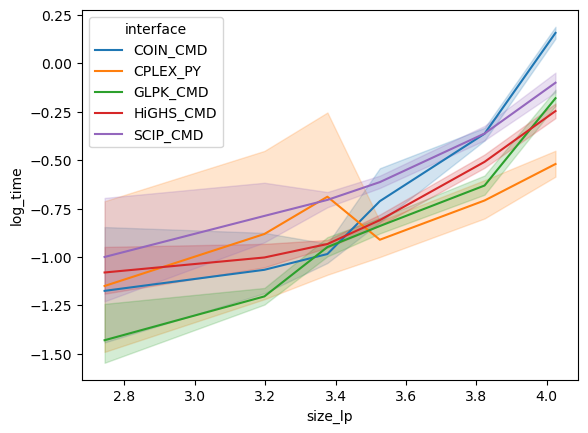

In [50]:
sns.lineplot(data=df.dropna().query('test == "LP1"'), x="size_lp", y="log_time", hue="interface")

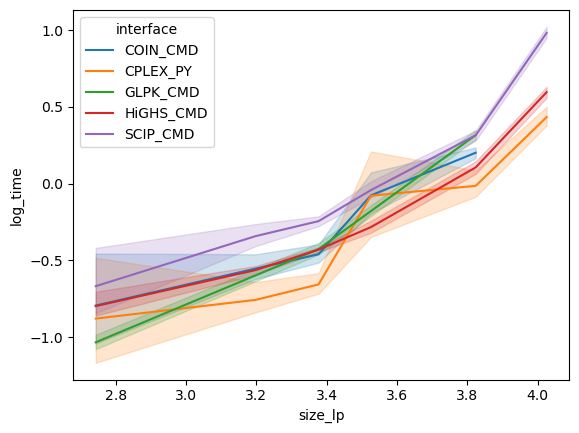

In [51]:
ax = sns.lineplot(data=df.dropna().query('test == "LP2"'), x="size_lp", y="log_time", hue="interface")
#ax.set_ylim(0, 5)

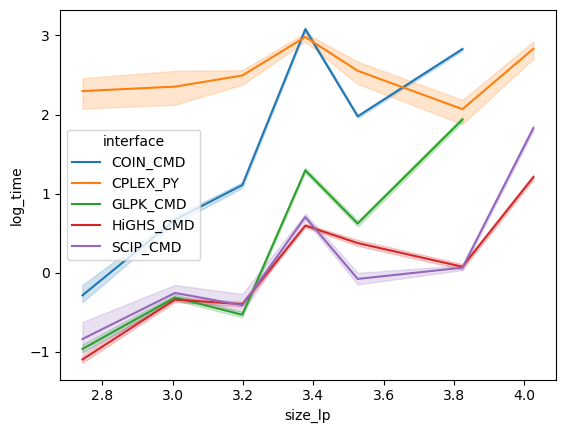

In [48]:
ax = sns.lineplot(data=df.dropna().query('test == "MILP1"'), x="size_lp", y="log_time", hue="interface")
#ax.set_ylim(0, 100)

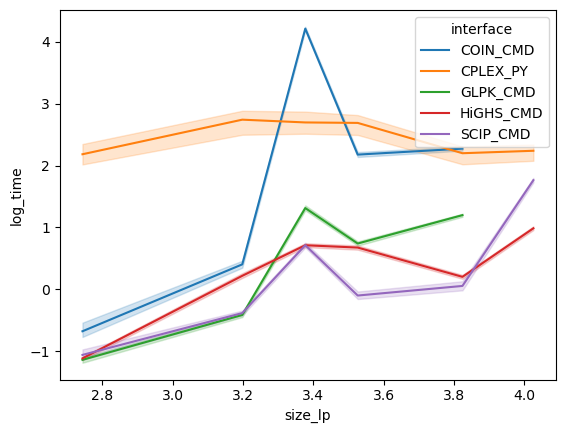

In [49]:
ax = sns.lineplot(data=df.dropna().query('test == "MILP2"'), x="size_lp", y="log_time", hue="interface")


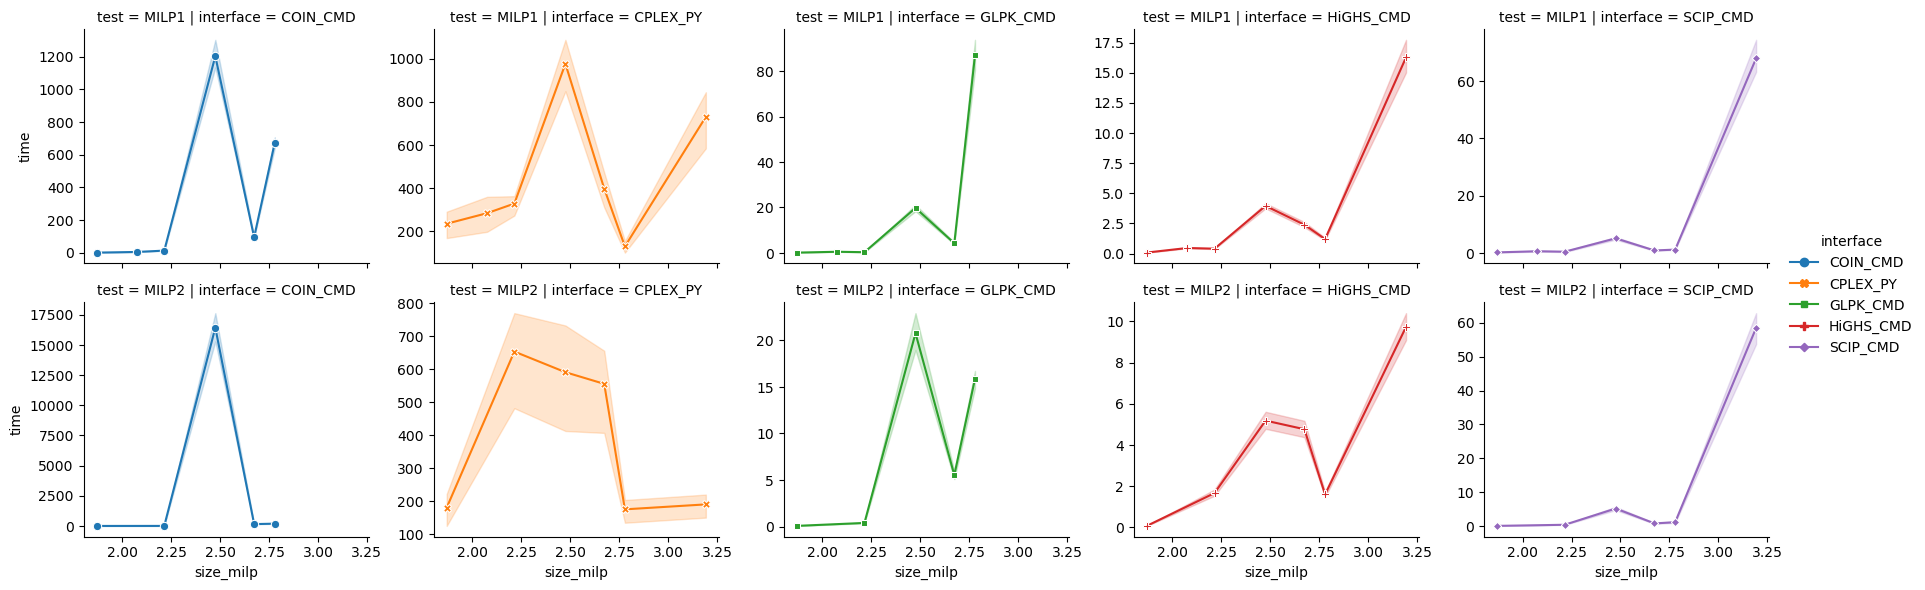

In [28]:
sns.relplot(data=df.dropna(), x="size_milp", y="time", col="interface", row="test", kind="line", height=3, aspect=1.2, markers=True, dashes=False, hue="interface", style="interface",
            row_order=['MILP1', 'MILP2'], facet_kws={'sharey': False} )

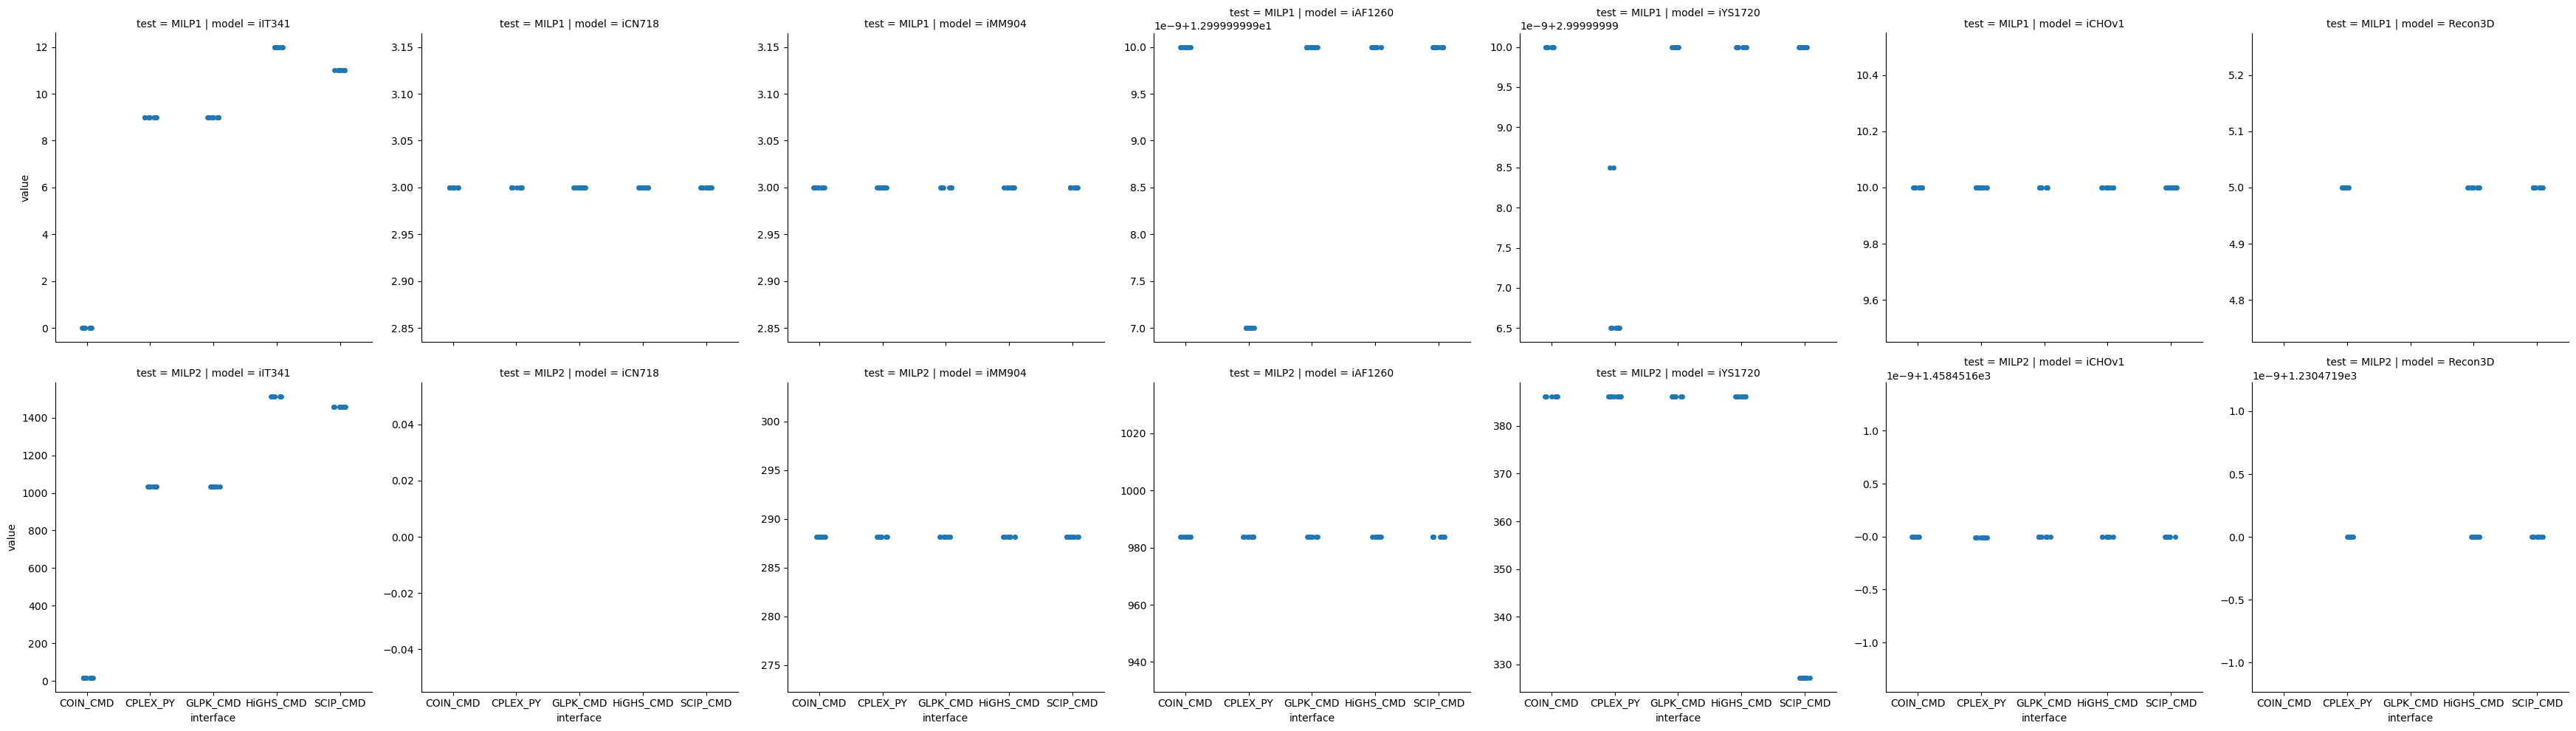

In [29]:
sns.catplot(data=df.dropna(), y="value", col="model", row="test", x="interface",
            row_order=['MILP1', 'MILP2'], col_order=size_milp.keys(), sharey=False)

In [62]:
df.dropna().groupby(['interface', 'model', 'test']).agg({'run':len}).sort_values('run')

run
interface model   test      
SCIP_CMD  iYS1720 MILP2    9
          Recon3D MILP2    9
HiGHS_CMD Recon3D MILP2    9
CPLEX_PY  iIT341  MILP2    9
HiGHS_CMD iYS1720 MILP2    9
...                      ...
CPLEX_PY  iMM904  LP2     10
                  LP1     10
          iIT341  MILP1   10
HiGHS_CMD iAF1260 LP1     10
GLPK_CMD  iIT341  LP2     10

[117 rows x 1 columns]

In [84]:
df2 = df.dropna().query('test == "MILP1"')

In [93]:
df2.groupby([ 'interface',]).agg({'time': np.median}).sort_values('time')

,time
interface,
GLPK_CMD,0.581095
SCIP_CMD,0.924150
HiGHS_CMD,1.112510
COIN_CMD,50.968837
CPLEX_PY,353.391504


In [96]:
df.query("model == 'iCN718' and test == 'LP1'")

,interface,model,test,run,value,time
